In [86]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

## Merge files

Since the files are saved as separate csv files, each represents a month of meetings of each zoom host accounts. Therefore, we need to synthesize them into 1 big file to analyze

In [ ]:
files = glob.glob(r"C:\Users\Admin\Documents\Studio Code\customer_retention_data\zoom\*\*.csv")
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

df.to_csv(r"C:\Users\Admin\Documents\Studio Code\customer_retention_data\zoom\zoom_allmeetings.csv", index=False)

## Cleaning

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Studio Code\customer_retention_data\zoom\zoom_allmeetings.csv")
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_27660\2272615803.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Admin\Documents\Studio Code\customer_retention_data\zoom\zoom_allmeetings.csv")


,Topic,Type,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Total participant minutes,...,Creation time,CANVAS,Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,Recording disclaimer response,In waiting room
0,2500COM,Meeting,976 6467 4097,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:27,9/30/2024 19:27,1.0,1.0,1.0,...,9/27/2024 1:09,NaN,ta1@minhvietacademy.org,ta1@minhvietacademy.org,9/30/2024 19:27,9/30/2024 19:27,1.0,No,No Response,No
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
3,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes,OK,No
4,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278676,25APENG,Meeting,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,1615.0,...,04/25/2025 01:54:17 AM,NaN,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,05/05/2025 07:12:31 PM,05/05/2025 07:25:37 PM,14.0,No,No Response,No
278677,25APENG,Meeting,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,1615.0,...,04/25/2025 01:54:17 AM,NaN,Doan Cam Tu 70116,19070116@minhvietacademy.org,05/05/2025 07:17:46 PM,05/05/2025 07:25:36 PM,8.0,No,No Response,No
278678,25APENG,Meeting,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,1615.0,...,04/25/2025 01:54:17 AM,NaN,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,05/05/2025 07:22:10 PM,05/05/2025 07:25:37 PM,4.0,No,No Response,No
278679,25APENG,Meeting,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,1615.0,...,04/25/2025 01:54:17 AM,NaN,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,05/05/2025 06:43:03 PM,05/05/2025 06:43:03 PM,0.0,No,No Response,No


In [4]:
#Drop rows where it is all NaN
df = df.dropna(how='all').reset_index(drop=True)
df.head()

,Topic,Type,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Total participant minutes,...,Creation time,CANVAS,Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,Recording disclaimer response,In waiting room
0,2500COM,Meeting,976 6467 4097,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:27,9/30/2024 19:27,1.0,1.0,1.0,...,9/27/2024 1:09,NaN,ta1@minhvietacademy.org,ta1@minhvietacademy.org,9/30/2024 19:27,9/30/2024 19:27,1.0,No,No Response,No
1,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
2,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes,OK,No
3,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
4,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No


In [5]:
#drop the rows that have participants < 5: These are the classes that were opened by mistake
df = df[df['Participants']>=5].reset_index(drop=True)
df.head()

,Topic,Type,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Total participant minutes,...,Creation time,CANVAS,Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,Recording disclaimer response,In waiting room
0,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
1,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes,OK,No
2,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
3,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
4,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No


In [6]:
#Select the targeted columns
df = df[['Topic', 'ID', 'Host name', 'Host email','Start time',
       'End time', 'Participants', 'Duration (minutes)', 'Name (original name)', 
       'Email', 'Join time', 'Leave time','Duration (minutes).1', 'Guest'
       ]]

df = df.rename(columns={'Duration (minutes).1': 'student_stay_duration'})
df.head()

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No


In [7]:
#Derive Student ID (SID) into a new separate column based on their email
df['SID'] = pd.to_numeric(df['Email'].str.split('@').str[0], errors='coerce')
df.head()

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest,SID
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,NaN
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes,NaN
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,23001816.0
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,22002469.0
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,24002190.0


In [8]:
#Change the SID column to integers
df['SID'] = df['SID'].astype('Int64')
df.head()

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest,SID
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,<NA>
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes,<NA>
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,23001816
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,22002469
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,24002190


In [9]:
 #convert the Time columns into Datetime format 
date_cols = ['Start time', 'End time', 'Join time', 'Leave time']
class_12h_datetime = ['2501HUM', '2500COM', '2501MAT', '25BA4', '25BA1']

def convert_datetime(row,col):
    try:
        if row['Topic'] in class_12h_datetime:
            return pd.to_datetime(row[col], errors='coerce')
        else:
            return pd.to_datetime(row[col], format = "%m/%d/%Y %I:%M:%S %p", errors='coerce')
    except:
        return pd.NaT

for col in date_cols:
    df[col] = df.apply(lambda row: convert_datetime(row, col), axis=1)

df

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest,SID
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,<NA>
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,"Hoang Anh, Bao",NaN,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,Yes,<NA>
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,23001816
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,22002469
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,24002190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,2025-05-05 19:12:31,2025-05-05 19:25:37,14.0,No,19050342
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,2025-05-05 19:17:46,2025-05-05 19:25:36,8.0,No,19070116
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,2025-05-05 19:22:10,2025-05-05 19:25:37,4.0,No,22002927
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,2025-05-05 18:43:03,2025-05-05 18:43:03,0.0,No,19052826


In [10]:
#Check the duplicates
dupes = df[df.duplicated(subset=['ID', 'SID', 'Join time', 'Leave time', 'Name (original name)', 'student_stay_duration'], keep=False)]
dupes

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest,SID
1024,2500COM,919 7293 4687,schedule 1,schedule1@minhvietacademy.org,2024-09-25 18:26:00,2024-09-25 19:25:00,140.0,59.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-09-25 18:26:00,2024-09-25 19:25:00,59.0,No,23003061
1025,2500COM,919 7293 4687,schedule 1,schedule1@minhvietacademy.org,2024-09-25 18:26:00,2024-09-25 19:25:00,140.0,59.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-09-25 18:26:00,2024-09-25 19:25:00,59.0,No,23003061
3710,2500COM,950 8205 0125,schedule 1,schedule1@minhvietacademy.org,2024-09-12 18:28:00,2024-09-12 19:25:00,128.0,58.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-09-12 18:28:00,2024-09-12 19:25:00,58.0,No,23003061
3719,2500COM,950 8205 0125,schedule 1,schedule1@minhvietacademy.org,2024-09-12 18:28:00,2024-09-12 19:25:00,128.0,58.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-09-12 18:28:00,2024-09-12 19:25:00,58.0,No,23003061
4790,2500COM,950 8205 0125,schedule 1,schedule1@minhvietacademy.org,2024-09-09 18:26:00,2024-09-09 19:25:00,156.0,59.0,"Nguyen Minh, Dang Nhat",NaN,2024-09-09 18:27:00,2024-09-09 18:34:00,8.0,Yes,<NA>
4792,2500COM,950 8205 0125,schedule 1,schedule1@minhvietacademy.org,2024-09-09 18:26:00,2024-09-09 19:25:00,156.0,59.0,"Nguyen Minh, Dang Nhat",NaN,2024-09-09 18:27:00,2024-09-09 18:34:00,8.0,Yes,<NA>
7468,2500COM,929 5583 6200,schedule 1,schedule1@minhvietacademy.org,2024-10-24 18:25:00,2024-10-24 19:25:00,131.0,60.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-10-24 18:30:00,2024-10-24 19:25:00,55.0,No,23003061
7475,2500COM,929 5583 6200,schedule 1,schedule1@minhvietacademy.org,2024-10-24 18:25:00,2024-10-24 19:25:00,131.0,60.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-10-24 18:30:00,2024-10-24 19:25:00,55.0,No,23003061
8070,2501HUM,994 5232 3853,schedule 1,schedule1@minhvietacademy.org,2024-10-22 19:26:00,2024-10-22 20:25:00,207.0,60.0,"Le ,Hoang",NaN,2024-10-22 20:08:00,2024-10-22 20:08:00,1.0,Yes,<NA>
8071,2501HUM,994 5232 3853,schedule 1,schedule1@minhvietacademy.org,2024-10-22 19:26:00,2024-10-22 20:25:00,207.0,60.0,"Le ,Hoang",NaN,2024-10-22 20:08:00,2024-10-22 20:08:00,1.0,Yes,<NA>


It seems like the duplicates are due to some specific students that use 2 devices at the same time. So, I will remove the duplicates

In [11]:
#Drop duplicates
df = df.drop_duplicates(subset=['ID', 'SID', 'Join time', 'Leave time', 'Name (original name)', 'student_stay_duration'], keep='last')

In [12]:
# Add Time, Date, Hour columns for later matching with other data and analysis
df['date'] = df['Start time'].dt.date
df['time'] = df['Start time'].dt.time
df['day_of_week'] = df['Start time'].dt.day_name()
df['hour'] = df['Start time'].dt.hour
df['stu_join_time'] = df['Join time'].dt.time
df['stu_leave_time'] = df['Leave time'].dt.time

df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27660\1064947026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['Start time'].dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_27660\1064947026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['Start time'].dt.time
C:\Users\Admin\AppData\Local\Temp\ipykernel_27660\1064947026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,...,Leave time,student_stay_duration,Guest,SID,date,time,day_of_week,hour,stu_join_time,stu_leave_time
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,...,2024-09-30 20:25:00,60.0,No,<NA>,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,"Hoang Anh, Bao",NaN,...,2024-09-30 20:25:00,60.0,Yes,<NA>,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,...,2024-09-30 20:25:00,60.0,No,23001816,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,...,2024-09-30 20:25:00,60.0,No,22002469,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,...,2024-09-30 20:25:00,60.0,No,24002190,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00


As there are always Teachers & Teaching Assistants (TA) in class, I will derive their role.

In [13]:
#Make sure Email is all string -> derive from email
df['Email'] = df['Email'].astype(str).str.strip()

#Split the part before '@' to see if it is an student email or TA (Teaching Assistant)/Teacher email
df['SID_str'] = df['Email'].str.split('@').str[0]
def role(value):
    if value == 'nan':
        return 'Student'
    elif str(value).isnumeric():
        return 'Student'
    else:
        return 'TA/Teacher'

df['role'] = df['SID_str'].apply(lambda x: role(x))
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27660\1599603827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Email'] = df['Email'].astype(str).str.strip()
C:\Users\Admin\AppData\Local\Temp\ipykernel_27660\1599603827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SID_str'] = df['Email'].str.split('@').str[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_27660\1599603827.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,...,Guest,SID,date,time,day_of_week,hour,stu_join_time,stu_leave_time,SID_str,role
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,...,No,<NA>,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00,schedule1,TA/Teacher
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,"Hoang Anh, Bao",nan,...,Yes,<NA>,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00,nan,Student
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,...,No,23001816,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00,23001816,Student
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,...,No,22002469,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00,22002469,Student
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,...,No,24002190,2024-09-30,19:25:00,Monday,19,19:25:00,20:25:00,24002190,Student


#### Data Consistency Check

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278204 entries, 0 to 278217
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Topic                  278204 non-null  object        
 1   ID                     278204 non-null  object        
 2   Host name              278204 non-null  object        
 3   Host email             278204 non-null  object        
 4   Start time             278204 non-null  datetime64[ns]
 5   End time               278204 non-null  datetime64[ns]
 6   Participants           278204 non-null  float64       
 7   Duration (minutes)     278204 non-null  float64       
 8   Name (original name)   278204 non-null  object        
 9   Email                  278204 non-null  object        
 10  Join time              278204 non-null  datetime64[ns]
 11  Leave time             278204 non-null  datetime64[ns]
 12  student_stay_duration  278204 non-null  float64  

In [15]:
df.isna().sum()

Topic                        0
ID                           0
Host name                    0
Host email                   0
Start time                   0
End time                     0
Participants                 0
Duration (minutes)           0
Name (original name)         0
Email                        0
Join time                    0
Leave time                   0
student_stay_duration        0
Guest                        0
SID                      46187
date                         0
time                         0
day_of_week                  0
hour                         0
stu_join_time                0
stu_leave_time               0
SID_str                      0
role                         0
dtype: int64

In [16]:
pd.set_option('display.max_rows', None)
df['Topic'].value_counts()
#pd.reset_option('display.max_rows', None)


Topic
2535EFL                      23076
2500COM                      17710
2502HUM                      17616
2503HUM                      17177
2501HUM                      17007
2504HUM                      16135
2505HUM                      15675
2506SCI                       9108
2506ELA                       8362
2506MAT                       7427
2569EFL1                      7419
2506WHI                       7393
2507SCI                       7195
2569EFL2                      7035
2507GEO                       7016
2507ELA                       6732
2507MAT                       6712
25APENG                       6620
2501MAT                       6280
2502MAT                       6252
2503MAT                       6050
2504MAT                       5790
2505MAT                       5452
25ECON                        4912
25APBIO                       4876
2508SCI                       4580
25APPCL                       4170
2508UHI                       4104
2508ELA       

-> `Schedule 8's Zoom Meeting` is a personal meeting, not a class from the organization so it needs to be removed.

In [17]:
#Remove unrelevant data
df = df[~(df['Topic'] == "Schedule 8's Zoom Meeting")]
df['Topic'].value_counts()

Topic
2535EFL       23076
2500COM       17710
2502HUM       17616
2503HUM       17177
2501HUM       17007
2504HUM       16135
2505HUM       15675
2506SCI        9108
2506ELA        8362
2506MAT        7427
2569EFL1       7419
2506WHI        7393
2507SCI        7195
2569EFL2       7035
2507GEO        7016
2507ELA        6732
2507MAT        6712
25APENG        6620
2501MAT        6280
2502MAT        6252
2503MAT        6050
2504MAT        5790
2505MAT        5452
25ECON         4912
25APBIO        4876
2508SCI        4580
25APPCL        4170
2508UHI        4104
2508ELA        3776
2508MAT        3728
25BA2          2674
25BA3          2474
25BA5          2101
25BA4          1997
25MH6          1746
25BA1          1673
25APBIOLAB      149
Name: count, dtype: int64

## EDA

In [18]:
df.describe(include='all')

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,...,Guest,SID,date,time,day_of_week,hour,stu_join_time,stu_leave_time,SID_str,role
count,278199,278199,278199,278199,278199,278199,278199.000000,278199.000000,278199,278199,...,278199,232017.0,278199,278199,278199,278199.000000,278199,278199,278199,278199
unique,37,1184,7,7,NaN,NaN,NaN,NaN,11561,1667,...,2,<NA>,173,662,7,NaN,10435,10517,1667,2
top,2535EFL,943 4030 4725,Schedule 2,schedule2@minhvietacademy.org,NaN,NaN,NaN,NaN,Nguyen Son Tung 13246,nan,...,No,<NA>,2024-09-10,19:26:00,Wednesday,NaN,19:27:00,20:25:00,nan,Student
freq,23076,1321,74946,74946,NaN,NaN,NaN,NaN,618,39299,...,238900,<NA>,2504,4311,68344,NaN,1124,5188,39299,271316
mean,NaN,NaN,NaN,NaN,2025-01-07 06:46:13.553801984,2025-01-07 07:45:32.710883072,133.816315,59.819367,NaN,NaN,...,NaN,21655648.390066,NaN,NaN,NaN,18.689719,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2024-09-04 18:24:49,2024-09-04 19:24:02,8.000000,2.000000,NaN,NaN,...,NaN,19040015.0,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2024-10-23 18:24:45,2024-10-23 19:24:04,95.000000,59.000000,NaN,NaN,...,NaN,20027982.0,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2025-01-07 18:26:50,2025-01-07 19:26:27,144.000000,60.000000,NaN,NaN,...,NaN,22000572.0,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2025-03-19 19:27:13,2025-03-19 20:26:39,171.000000,61.000000,NaN,NaN,...,NaN,23002363.0,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2025-05-30 19:28:59,2025-05-30 20:55:38,258.000000,247.000000,NaN,NaN,...,NaN,25000396.0,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN


The max of class duration (247 minutes) seems to be a bit extreme compared to the median of 60 minutes. So I will check for outliers/inconsistencies.

In [19]:
#Check if those classes that last longer than 100 minutes (some classes are 90 minutes) are outliers / mistakes or not
pd.set_option('display.max_columns', None)
df[df['Duration (minutes)'] > 100]

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest,SID,date,time,day_of_week,hour,stu_join_time,stu_leave_time,SID_str,role
245519,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Schedule 8 (Host),schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 19:27:44,2.0,No,<NA>,2024-12-03,19:26:08,Tuesday,19,19:26:08,19:27:44,schedule8,TA/Teacher
245520,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Le Ngoc Tan Dan 34444,20034444@minhvietacademy.org,2024-12-03 19:27:01,2024-12-03 20:09:47,43.0,No,20034444,2024-12-03,19:26:08,Tuesday,19,19:27:01,20:09:47,20034444,Student
245521,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Nguyen Nhat Quang 01075,24001075@minhvietacademy.org,2024-12-03 19:27:09,2024-12-03 20:22:56,56.0,No,24001075,2024-12-03,19:26:08,Tuesday,19,19:27:09,20:22:56,24001075,Student
245522,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Le Tran Minh 34095,20034095@minhvietacademy.org,2024-12-03 19:27:10,2024-12-03 19:46:54,20.0,No,20034095,2024-12-03,19:26:08,Tuesday,19,19:27:10,19:46:54,20034095,Student
245523,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Le Tuong Vi 34879,20034879@minhvietacademy.org,2024-12-03 19:27:11,2024-12-03 20:30:05,63.0,No,20034879,2024-12-03,19:26:08,Tuesday,19,19:27:11,20:30:05,20034879,Student
245524,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,TA Thanh ( Schedule 8 ) (Host),schedule8@minhvietacademy.org,2024-12-03 19:27:12,2024-12-03 21:36:22,130.0,No,<NA>,2024-12-03,19:26:08,Tuesday,19,19:27:12,21:36:22,schedule8,TA/Teacher
245525,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Tran Le Anh 01423,23001423@minhvietacademy.org,2024-12-03 19:27:13,2024-12-03 20:01:58,35.0,No,23001423,2024-12-03,19:26:08,Tuesday,19,19:27:13,20:01:58,23001423,Student
245526,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Nguyen Khanh Linh 00475,24000475@minhvietacademy.org,2024-12-03 19:27:16,2024-12-03 20:25:48,59.0,No,24000475,2024-12-03,19:26:08,Tuesday,19,19:27:16,20:25:48,24000475,Student
245527,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Vu Minh Hieu 45539,20045539@minhvietacademy.org,2024-12-03 19:27:16,2024-12-03 20:29:19,63.0,No,20045539,2024-12-03,19:26:08,Tuesday,19,19:27:16,20:29:19,20045539,Student
245528,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Nguyen Tam Nhu 04189,20004189@minhvietacademy.org,2024-12-03 19:27:37,2024-12-03 20:25:44,59.0,No,20004189,2024-12-03,19:26:08,Tuesday,19,19:27:37,20:25:44,20004189,Student


- The meeting **2508ELA starting at 2024-12-03 19:26:08 seems to be a mistake from TA** (not closing the zoom meeting on time when class ends). 

Since most of the students leave at around 20:25 (the official class ending time) but only TA and 1-2 students stay until 21:30. 

- The meeting **25APBIOLAB is a BIO experiment** class which happens only once in a while and does not represent a typical class. 

-> So I will remove these 2 classes from the observed dataset


In [20]:
#Remove the class which TA closed on the wrong time
df = df[~(df['Duration (minutes)'] >= 131)]
df[df['Duration (minutes)'] > 100] #check if the 2 classes still there

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest,SID,date,time,day_of_week,hour,stu_join_time,stu_leave_time,SID_str,role


Different classes have different durations:
- MH6, APPCL: 90 minutes
- All EFL classes: 45 minutes
- The rest: 60 minutes

So now I will check the duration per class to check for outliers.

In [21]:
#Check the duration per class to check for outliers
duration_per_class = df.groupby('Topic').agg(
    dur_per_class=('Duration (minutes)', 'mean')
).reset_index()

duration_per_class #everything seem good

,Topic,dur_per_class
0,2500COM,59.605195
1,2501HUM,59.098665
2,2501MAT,59.518949
3,2502HUM,60.387318
4,2502MAT,60.418586
5,2503HUM,60.111719
6,2503MAT,60.156694
7,2504HUM,61.276666
8,2504MAT,61.589119
9,2505HUM,60.909474


## Graphical Visualization

`Q0: Overview on Class durations`

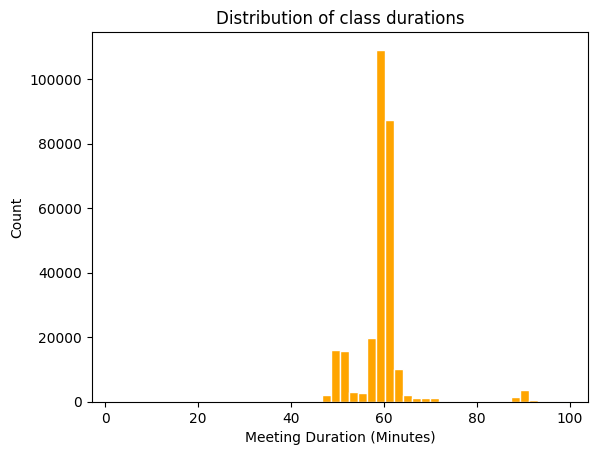

In [89]:
plt.hist(df['Duration (minutes)'], bins=50, edgecolor='white', color='orange')
plt.xlabel('Meeting Duration (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of class durations')
plt.show()

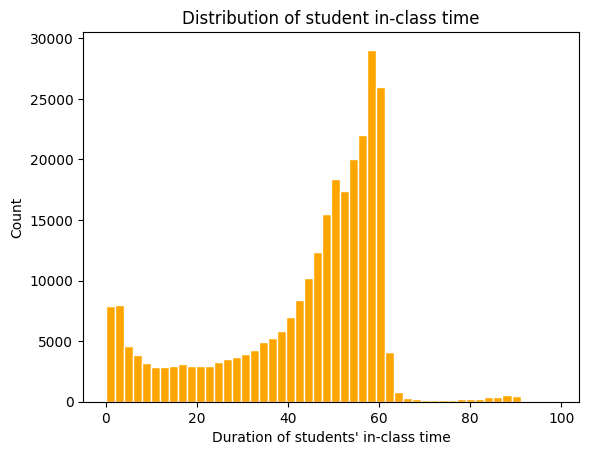

In [90]:
plt.hist(df['student_stay_duration'], bins=50, edgecolor='white', color='orange')
plt.xlabel("Duration of students' in-class time")
plt.ylabel('Count')
plt.title('Distribution of student in-class time')
plt.show()

Since class time between different classes vary, I will check the percentage of average student in-class time over their class duration.

In [24]:
#Get student_stay_percent: how long (in %) a student stays in class over the class period
df['student_stay_percent'] = (df['student_stay_duration']/df['Duration (minutes)']) *100
df.tail()

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest,SID,date,time,day_of_week,hour,stu_join_time,stu_leave_time,SID_str,role,student_stay_percent
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,2025-05-05 19:12:31,2025-05-05 19:25:37,14.0,No,19050342,2025-05-05,18:24:38,Monday,18,19:12:31,19:25:37,19050342,Student,22.950820
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,2025-05-05 19:17:46,2025-05-05 19:25:36,8.0,No,19070116,2025-05-05,18:24:38,Monday,18,19:17:46,19:25:36,19070116,Student,13.114754
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,2025-05-05 19:22:10,2025-05-05 19:25:37,4.0,No,22002927,2025-05-05,18:24:38,Monday,18,19:22:10,19:25:37,22002927,Student,6.557377
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,2025-05-05 18:43:03,2025-05-05 18:43:03,0.0,No,19052826,2025-05-05,18:24:38,Monday,18,18:43:03,18:43:03,19052826,Student,0.000000
278217,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,2025-05-05 18:44:02,2025-05-05 19:25:36,42.0,No,19052826,2025-05-05,18:24:38,Monday,18,18:44:02,19:25:36,19052826,Student,68.852459


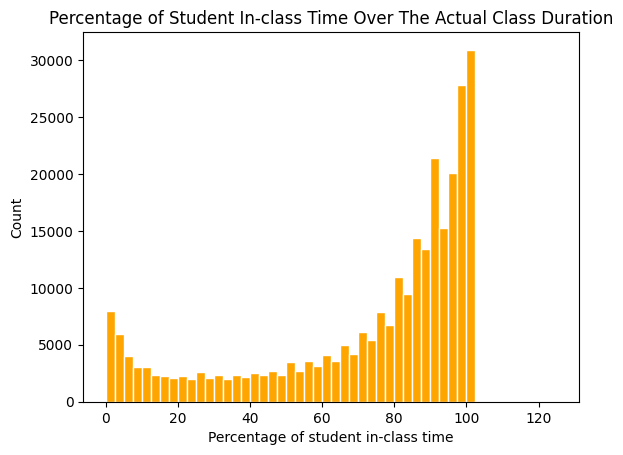

In [91]:
plt.hist(df['student_stay_percent'], bins=50, edgecolor='white', color='orange')
plt.xlabel('Percentage of student in-class time')
plt.ylabel('Count')
plt.title('Percentage of Student In-class Time Over The Actual Class Duration')
plt.show()

In [26]:
#Check the percentage of observations which students join under 20% of class time 
round((len(df[df['student_stay_percent']<20])/len(df))*100,2)

11.07

From the graph, there are still a **large number of cases where students attend under 20% of total class time (takes up 11% of total records)** or under 50% of class time (takes up 21%). 

E.g. If the class is 60 minutes in length, they attend less than 12 minutes (20% of class time).

-> We will dive deeper to these late students

### 1. PUNCTUALITY

`Q1: How late are the students?`

- Find **Minutes late of students**

In [27]:
df['minutes_late'] = round((df['Join time']-df['Start time']).dt.total_seconds()/60)
df.tail()

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest,SID,date,time,day_of_week,hour,stu_join_time,stu_leave_time,SID_str,role,student_stay_percent,minutes_late
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,2025-05-05 19:12:31,2025-05-05 19:25:37,14.0,No,19050342,2025-05-05,18:24:38,Monday,18,19:12:31,19:25:37,19050342,Student,22.950820,48.0
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,2025-05-05 19:17:46,2025-05-05 19:25:36,8.0,No,19070116,2025-05-05,18:24:38,Monday,18,19:17:46,19:25:36,19070116,Student,13.114754,53.0
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,2025-05-05 19:22:10,2025-05-05 19:25:37,4.0,No,22002927,2025-05-05,18:24:38,Monday,18,19:22:10,19:25:37,22002927,Student,6.557377,58.0
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,2025-05-05 18:43:03,2025-05-05 18:43:03,0.0,No,19052826,2025-05-05,18:24:38,Monday,18,18:43:03,18:43:03,19052826,Student,0.000000,18.0
278217,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,2025-05-05 18:44:02,2025-05-05 19:25:36,42.0,No,19052826,2025-05-05,18:24:38,Monday,18,18:44:02,19:25:36,19052826,Student,68.852459,19.0


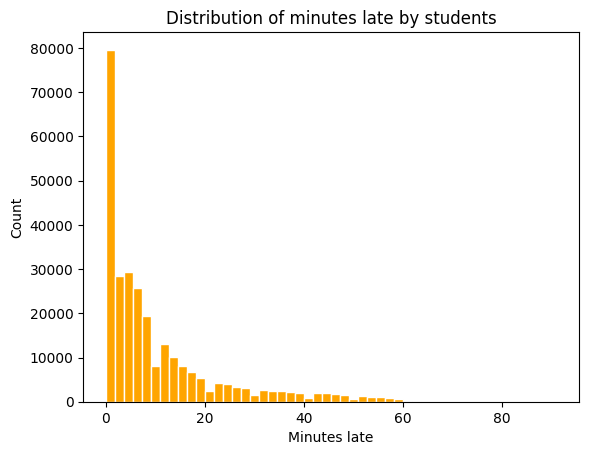

In [92]:
plt.hist(df['minutes_late'], bins=50, edgecolor='white', color='orange')
plt.xlabel('Minutes late')
plt.ylabel('Count')
plt.title('Distribution of minutes late by students')
plt.show()

- Get the **Percentage of the late students per class** and their **Average minutes late** to spot classes with low punctuality

In [29]:
# Mark students that are late more than 20 minutes
df['is_late'] = df['minutes_late'] > 20

# Count unique students per class
total_counts = df.groupby(['Topic','date'])['Name (original name)'].nunique().reset_index(name='total_students')

# Duration of each class
duration_by_class = df.groupby(['Topic','date']).agg(
    avg_class_duration=('Duration (minutes)', 'mean')
).reset_index()

# Count late students + avg lateness, by SESSION
late_counts = df[df['is_late']].groupby(['Topic','date']).agg(
    num_late=('Name (original name)', 'nunique'),
    avg_min_late=('minutes_late', 'mean')
).reset_index()

# Merge and compute percentage
late_stats = late_counts.merge(total_counts, on=['Topic','date'])
late_stats = late_stats.merge(duration_by_class, on=['Topic','date'])
late_stats['pct_late'] = (late_stats['num_late'] / late_stats['total_students']) * 100
late_stats['pct_class_duration'] = (late_stats['avg_min_late'] / late_stats['avg_class_duration']) * 100

late_stats.head()

,Topic,date,num_late,avg_min_late,total_students,avg_class_duration,pct_late,pct_class_duration
0,2500COM,2024-09-04,13,33.722222,115,60.0,11.304348,56.203704
1,2500COM,2024-09-05,10,41.400000,121,58.0,8.264463,71.379310
2,2500COM,2024-09-09,19,36.466667,116,59.0,16.379310,61.807910
3,2500COM,2024-09-10,19,38.814815,117,61.0,16.239316,63.630844
4,2500COM,2024-09-11,22,38.913043,126,60.0,17.460317,64.855072


In [30]:
late_stats_by_class = late_stats.groupby('Topic').agg(
    num_late = ('num_late', 'mean'),
    avg_min_late = ('avg_min_late', 'mean'),
    pct_late = ('pct_late', 'mean'),
    pct_class_duration = ('pct_class_duration', 'mean')
).reset_index()

late_stats_by_class

,Topic,num_late,avg_min_late,pct_late,pct_class_duration
0,2500COM,14.451128,35.018920,12.286035,58.754517
1,2501HUM,17.357143,34.919219,11.222627,59.114272
2,2501MAT,18.628571,35.950405,11.866038,60.427100
3,2502HUM,22.040816,35.938032,14.020847,59.532726
4,2502MAT,20.914286,35.413655,13.433555,58.640290
5,2503HUM,20.785714,36.042985,13.537474,59.975595
6,2503MAT,19.742857,36.151378,13.001952,60.137750
7,2504HUM,20.530612,35.367602,15.071600,57.828119
8,2504MAT,19.714286,35.942177,14.531728,58.394163
9,2505HUM,18.632653,34.938605,13.092266,57.382100


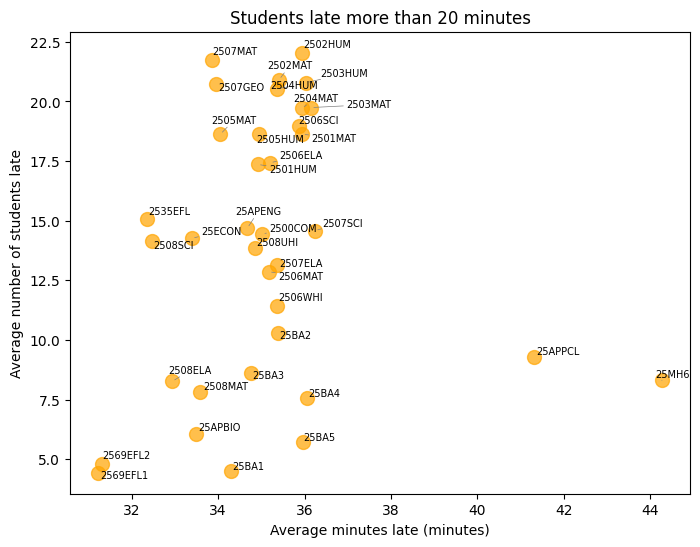

In [115]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    late_stats_by_class['avg_min_late'],
    late_stats_by_class['num_late'],
    #c=range(len(late_stats_by_class)),
    color='orange',
    s=100,
    alpha=0.7
)

texts=[]
for i,row in late_stats_by_class.iterrows():
    texts.append(
        plt.text(
            row['avg_min_late'],
            row['num_late'],
            row['Topic'],
            fontsize=7
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', lw=0.5, color='grey'))

plt.xlabel('Average minutes late (minutes)')
plt.ylabel('Average number of students late')
plt.title('Students late more than 20 minutes')
plt.show()

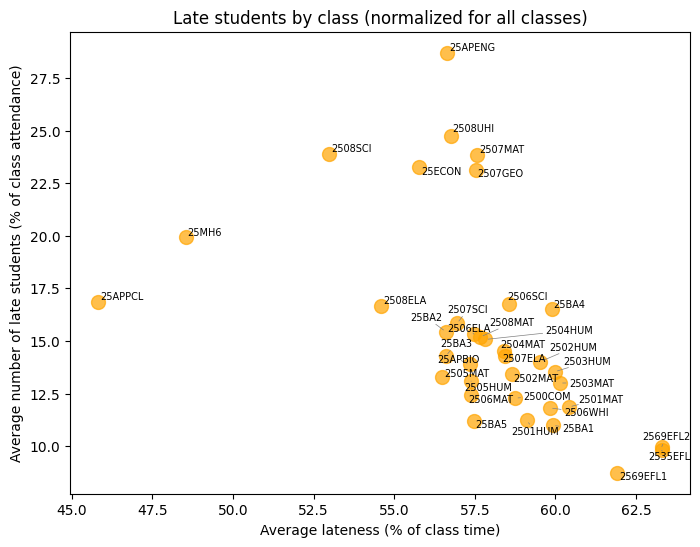

In [114]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    late_stats_by_class['pct_class_duration'],
    late_stats_by_class['pct_late'],
    #c=range(len(late_stats_by_class)),
    color='orange',
    s=100,
    alpha=0.7
)

texts = []
for i,row in late_stats_by_class.iterrows():
    texts.append(
        plt.text(
            row['pct_class_duration'],
            row['pct_late'],
            row['Topic'],
            fontsize=7
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-',lw=0.5,color='grey'))

plt.xlabel('Average lateness (% of class time)')
plt.ylabel('Average number of late students (% of class attendance)')
plt.title('Late students by class (normalized for all classes)')
plt.show()

In [33]:
#Details of punctuality issues, aggregated by class
late_stats_by_class.describe()

,num_late,avg_min_late,pct_late,pct_class_duration
count,36.000000,36.000000,36.000000,36.000000
mean,13.893525,35.085818,15.524243,57.651096
std,5.608563,2.343342,4.748829,3.337046
min,4.439394,31.223428,8.738449,45.818719
25%,8.555556,33.930029,12.408788,56.724872
50%,14.357917,35.096317,14.287598,57.622546
75%,18.720813,35.939068,16.699696,59.606255
max,22.040816,44.271697,28.696662,63.299969


#### Findings on Punctuality (lateness > 20 minutes):
- **All classes have punctuality issues**
- There are **13 students late per class** on average
- Adjusted for class size, **15% per class are late**, with the **maximum being 29% late (25APENG)**
- **Older grades tend to have more late students** (>20%): 
    - Grade 7: *2507MAT, 2507GEO*
    - Grade 8: *2508SCI, 2508UHI*
    - Grade 9-12: *25APENG, 25ECON*
- Once the students are late, they are usually **late for 35 minutes**, and **missed 58% of class time**

#### Interpretation & Additional insights:
- Missing more than half of class time can be considered as 'absences'
- Older grades joing late regularly (especially for some specific subjects) suggests **low willingness/low demand to learn the subjects or external academic pressures** (e.g. their exams at schools)
- **25APENG** is the priority concern with nearly 1 in 3 students arriving late consistently

We later will analyze whether lateness affect student's attendance or retention problems, to determine how serious this problem is.

---

`Q2: How about students leaving early, before class ends?`

In [34]:
df.columns

Index(['Topic', 'ID', 'Host name', 'Host email', 'Start time', 'End time',
       'Participants', 'Duration (minutes)', 'Name (original name)', 'Email',
       'Join time', 'Leave time', 'student_stay_duration', 'Guest', 'SID',
       'date', 'time', 'day_of_week', 'hour', 'stu_join_time',
       'stu_leave_time', 'SID_str', 'role', 'student_stay_percent',
       'minutes_late', 'is_late'],
      dtype='object')

In [35]:
#Get the minutes leaving early of each student
df['minutes_leave_early'] = round((df['End time']-df['Leave time']).dt.total_seconds()/60)
df.tail()

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,student_stay_duration,Guest,SID,date,time,day_of_week,hour,stu_join_time,stu_leave_time,SID_str,role,student_stay_percent,minutes_late,is_late,minutes_leave_early
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,2025-05-05 19:12:31,2025-05-05 19:25:37,14.0,No,19050342,2025-05-05,18:24:38,Monday,18,19:12:31,19:25:37,19050342,Student,22.950820,48.0,True,0.0
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,2025-05-05 19:17:46,2025-05-05 19:25:36,8.0,No,19070116,2025-05-05,18:24:38,Monday,18,19:17:46,19:25:36,19070116,Student,13.114754,53.0,True,0.0
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,2025-05-05 19:22:10,2025-05-05 19:25:37,4.0,No,22002927,2025-05-05,18:24:38,Monday,18,19:22:10,19:25:37,22002927,Student,6.557377,58.0,True,0.0
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,2025-05-05 18:43:03,2025-05-05 18:43:03,0.0,No,19052826,2025-05-05,18:24:38,Monday,18,18:43:03,18:43:03,19052826,Student,0.000000,18.0,False,43.0
278217,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,2025-05-05 18:44:02,2025-05-05 19:25:36,42.0,No,19052826,2025-05-05,18:24:38,Monday,18,18:44:02,19:25:36,19052826,Student,68.852459,19.0,False,0.0


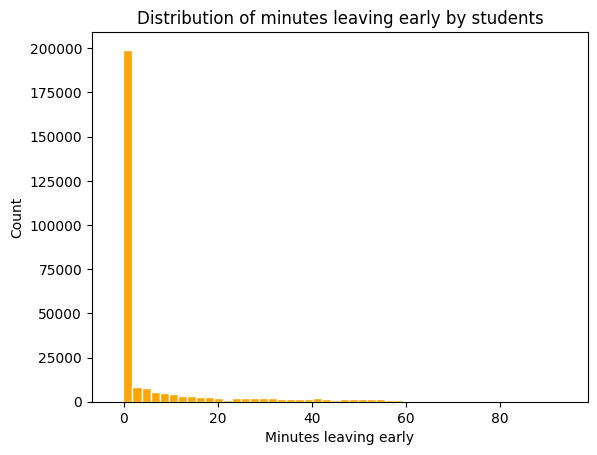

In [110]:
plt.hist(df['minutes_leave_early'], bins=50, edgecolor='white', color='orange')
plt.xlabel('Minutes leaving early')
plt.ylabel('Count')
plt.title('Distribution of minutes leaving early by students')
plt.show()

In [37]:
#Whether a student leaves early
df['leave_early'] = df['minutes_leave_early'] > 30

#Get Number of students leaving early & Average minutes leave early, by SESSION
leave_stats = df[df['leave_early']].groupby(['Topic','date']).agg(
    num_leave=('Name (original name)', 'nunique'),
    avg_min_leave=('minutes_leave_early', 'mean')
).reset_index()

leave_stats = leave_stats.merge(total_counts, on=['Topic','date'])
leave_stats = leave_stats.merge(duration_by_class, on=['Topic','date'])

#Get percents
leave_stats['pct_leave'] = (leave_stats['num_leave']/leave_stats['total_students'])*100
leave_stats['pct_leave_minutes'] = (leave_stats['avg_min_leave']/leave_stats['avg_class_duration'])*100

leave_stats.head()

,Topic,date,num_leave,avg_min_leave,total_students,avg_class_duration,pct_leave,pct_leave_minutes
0,2500COM,2024-09-04,6,44.125000,115,60.0,5.217391,73.541667
1,2500COM,2024-09-05,10,44.000000,121,58.0,8.264463,75.862069
2,2500COM,2024-09-09,12,46.590909,116,59.0,10.344828,78.967643
3,2500COM,2024-09-10,11,47.571429,117,61.0,9.401709,77.985948
4,2500COM,2024-09-11,12,48.812500,126,60.0,9.523810,81.354167


In [38]:
leave_stats_by_class = leave_stats.groupby('Topic').agg(
    num_leave = ('num_leave', 'mean'),
    avg_min_leave = ('avg_min_leave', 'mean'),
    pct_leave = ('pct_leave', 'mean'),
    pct_leave_min = ('pct_leave_minutes', 'mean')
).reset_index()

leave_stats_by_class

,Topic,num_leave,avg_min_leave,pct_leave,pct_leave_min
0,2500COM,9.255639,45.677948,7.818881,76.647358
1,2501HUM,10.591837,44.864086,6.739899,75.952415
2,2501MAT,11.457143,44.302265,7.210918,74.476599
3,2502HUM,11.408163,45.275683,7.205777,74.998760
4,2502MAT,11.314286,44.700463,7.154529,74.021072
5,2503HUM,9.969388,44.563043,6.441642,74.156460
6,2503MAT,9.628571,44.868334,6.279999,74.664055
7,2504HUM,13.265306,45.276781,9.623111,73.967703
8,2504MAT,14.542857,45.626095,10.541223,74.147961
9,2505HUM,10.500000,45.403334,7.356474,74.543597


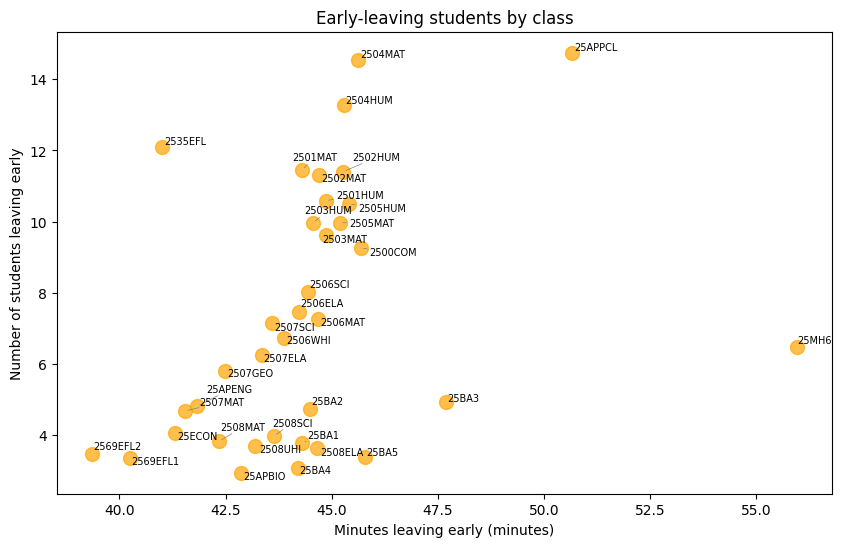

In [100]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    leave_stats_by_class['avg_min_leave'],
    leave_stats_by_class['num_leave'],
    #c=range(len(leave_stats_by_class)),
    color='orange',
    s=100,
    alpha=0.7
)

texts=[]
for i,row in leave_stats_by_class.iterrows():
    texts.append(
        plt.text(
            row['avg_min_leave'],
            row['num_leave'],
            row['Topic'],
            fontsize=7
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))

plt.xlabel('Minutes leaving early (minutes)')
plt.ylabel('Number of students leaving early')
plt.title('Early-leaving students by class')
plt.show()

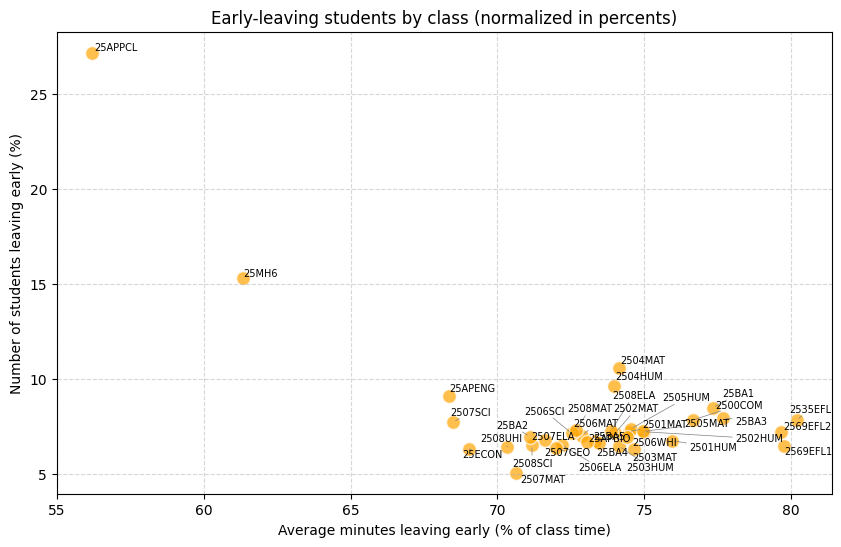

In [96]:
plt.figure(figsize=(10,6))

plt.scatter(
    leave_stats_by_class['pct_leave_min'],
    leave_stats_by_class['pct_leave'],
    color='orange',
    edgecolor='white',
    s=100,
    alpha=0.7
)

# Collect text objects
texts = []
for i, row in leave_stats_by_class.iterrows():
    texts.append(
        plt.text(
            row['pct_leave_min'],
            row['pct_leave'],
            row['Topic'],
            fontsize=7
        )
    )

# Automatically adjust labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Labels & title
plt.xlabel('Average minutes leaving early (% of class time)')
plt.ylabel('Number of students leaving early (%)')
plt.title('Early-leaving students by class (normalized in percents)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [41]:
leave_stats_by_class.describe()

,num_leave,avg_min_leave,pct_leave,pct_leave_min
count,36.000000,36.000000,36.000000,36.000000
mean,7.281199,44.376090,7.976882,72.940489
std,3.574864,2.854085,3.696931,4.560024
min,2.934783,39.357902,5.045223,56.192040
25%,3.932208,43.115239,6.570933,71.507218
50%,6.603758,44.375979,7.139535,73.659525
75%,10.103571,45.213052,7.738689,74.735050
max,14.750000,55.946785,27.183591,80.196284


#### Findings for Leaving-early (leaving early > 30 minutes):
- **All classes have early-leaving issues**, but not as serious as lateness issue.
- There are **7 students leaving early per class** on average.
- Adjusted for class size, only **8% per class leave early**, but the **maximum is 27% (25APPCL)**.
- **Longer classes have notably more early-leaving students** (>10%): *25PPCL and 25MH6* (both are 90 minutes - compared to the remaining classes of 60 minutes).
- All the **remaining classes range within 5-10% early-leaving rate**.
- Once the students leave early, they missed nearly the whole period (70-80% class period) -> We may consider this as **absences** instead (will be analyzed later).

#### Interpretation & Summary:
- Compared to lateness (15% of students, ~35 minutes late), **early leaving is less common but is more troublesome, because students tend to miss nearly the entire lesson** (~73 minutes) -> can be considered as absences. 
- The link between class length and early-leaving rate suggests that **fatigue may be the problem** -> may need to adjust schedules.
- Class **25APPCL** is a priority concern with an outstanding 27% students leaving early.

---

### 2. PRESENCE & ABSENCE

`Q3: How are the class attendances (participants) over time?`

In [42]:
#Get participant stats grouped by date and Topic (or the session of each class)
participant_stats = df.groupby(['date', 'Topic']).agg(
    participants=('Name (original name)', 'nunique')
).reset_index()

participant_stats['date'] = pd.to_datetime(participant_stats['date'])
participant_stats['month'] = participant_stats['date'].dt.to_period('M')

monthly_stats = participant_stats.groupby(['month', 'Topic']).agg(
    participants=('participants', 'mean')
).reset_index()

monthly_stats['month'] = monthly_stats['month'].dt.to_timestamp()

monthly_stats.tail()

,month,Topic,participants
319,2025-05-01,25BA3,45.6
320,2025-05-01,25BA4,35.2
321,2025-05-01,25BA5,39.2
322,2025-05-01,25ECON,42.5
323,2025-05-01,25MH6,33.0


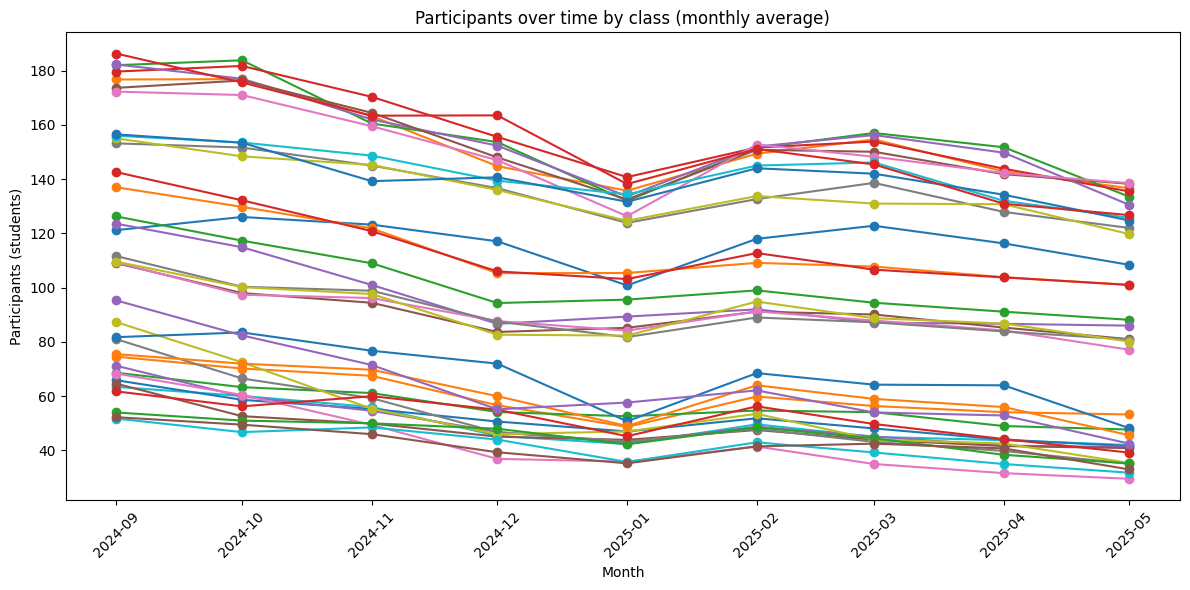

In [43]:
plt.figure(figsize=(12,6))

for topic, grp in monthly_stats.groupby('Topic'):
    plt.plot(grp['month'], grp['participants'], marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Participants (students)')
plt.title('Participants over time by class (monthly average)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

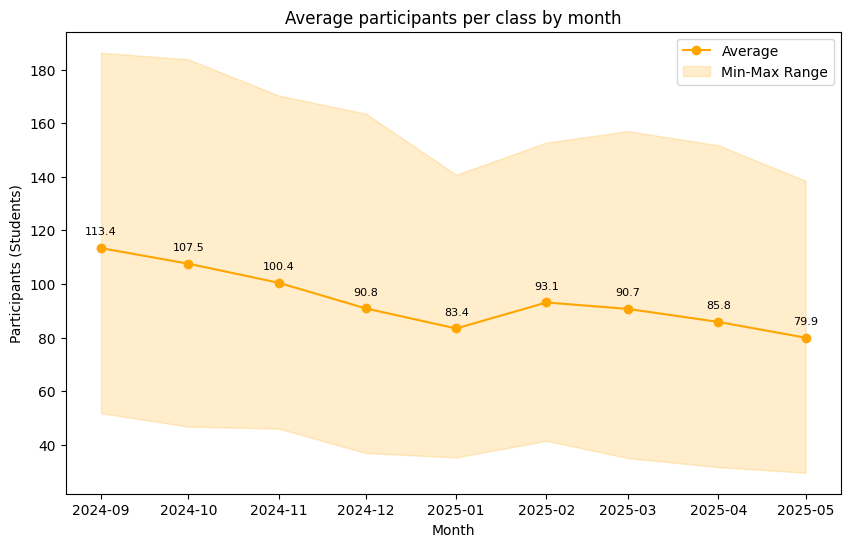

In [143]:
#Get the overall school participants over the year
all_participants = monthly_stats.groupby('month').agg(
    mean=('participants', 'mean'),
    min=('participants', 'min'),
    max=('participants','max')
).reset_index()

#Plot
plt.figure(figsize=(10,6))
plt.plot(all_participants['month'], all_participants['mean'], marker='o', linestyle='-', color='orange', label='Average')
plt.fill_between( all_participants['month'], all_participants['min'], all_participants['max'], alpha=0.2, color='orange', label='Min-Max Range')

for i, row in all_participants.iterrows():
    plt.text(row['month'], row['mean']+5, 
             f"{row['mean']:.1f}", 
             fontsize=8, ha='center', color='black')

plt.xlabel('Month')
plt.ylabel('Participants (Students)')
plt.title("Average participants per class by month")
plt.legend()
plt.show()#### Findings for Partcipation levels trend:

**Overall**: All classes show **decreasing** trend of participants over the year:

**Key periods:**
- Sep-Dec: Steady decline, may show natural drop-off after start-of-the-year peak
- Jan: Significant drop for all classes (likely because this is the biggest holiday month of the year)
- Feb-Mar: Slight recovery in participation, but the levels did not return to September baseline
- Apr-May: Decline resumed, reaching the lowest point of the year

#### Interpretation & Summary:
- Seasonality in participation levels is reflected around January holidays
- The continued drop in March may reflect **long-term decline trend**, not seasonal effects
- By May, the **class sizes are significantly lower than at the start** of the year

#### Recommendations:
- Prepare **re-engagement campaigns** right after the holiday period (Jan)
- Investigate **reasons for long-term decline** (e.g. student/parent surveys)
- Plan **incentives/target advising** for **students who usually miss class

---

`Q4: Which classes experience the largest drops in attendance?`

- Get the percent participant drop from start to end of school year

In [45]:
pivot_months = monthly_stats.pivot(
    index='Topic',
    columns='month',
    values='participants'
).reset_index()

sep_col = pd.Timestamp('2024-09-01')
may_col = pd.Timestamp('2025-05-01')

pivot_months['participant_drop'] = pivot_months[sep_col] - pivot_months[may_col]
pivot_months['%drop'] = (pivot_months['participant_drop']/pivot_months[sep_col])*100
pivot_months.head()

month,Topic,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,participant_drop,%drop
0,2500COM,121.200000,126.052632,123.230769,117.083333,100.818182,118.000000,122.823529,116.312500,108.400000,12.800000,10.561056
1,2501HUM,176.727273,176.857143,163.222222,144.777778,135.750000,149.363636,154.615385,142.833333,136.636364,40.090909,22.685185
2,2501MAT,182.000000,183.800000,160.500000,153.666667,132.000000,151.500000,157.000000,151.750000,133.500000,48.500000,26.648352
3,2502HUM,179.636364,181.714286,170.333333,155.555556,140.750000,151.636364,153.846154,143.833333,135.454545,44.181818,24.595142
4,2502MAT,182.250000,177.000000,162.000000,152.333333,133.666667,152.000000,156.250000,149.750000,130.500000,51.750000,28.395062


In [46]:
#Sort the classes by %drop
pivot_months = pivot_months.sort_values(by='%drop', ascending=False).reset_index()
pivot_months[['Topic', '%drop']]

month,Topic,%drop
0,25APPCL,59.472177
1,25APBIO,56.762749
2,25APENG,56.677890
3,25ECON,55.397301
4,2569EFL1,42.041199
5,25BA2,41.039755
6,25BA3,39.602649
7,25BA1,38.550725
8,2508MAT,36.893467
9,25MH6,36.842105


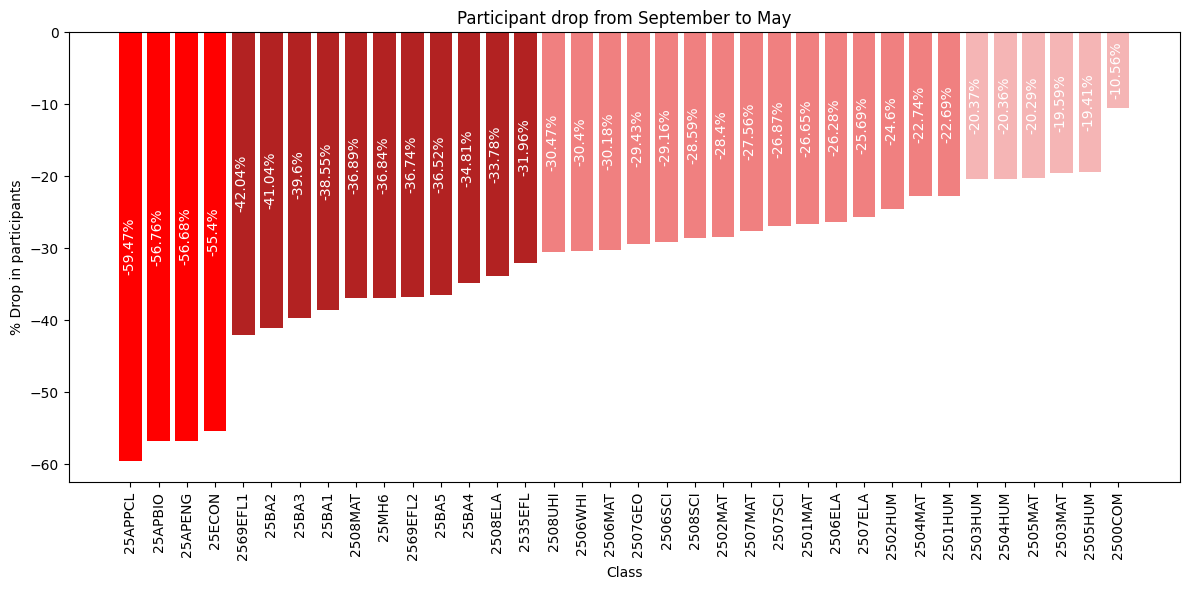

In [142]:
#Plot
colors = ['red', 'red', 'red','red', 'firebrick','firebrick', 'firebrick', 'firebrick', 'firebrick', 'firebrick', 'firebrick', 'firebrick', 'firebrick', 'firebrick', 'firebrick',  'lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','#f5b5b5','#f5b5b5','#f5b5b5','#f5b5b5','#f5b5b5', '#f5b5b5']

plt.figure(figsize=(12,6))
plt.bar(pivot_months['Topic'], -pivot_months['%drop'], width=0.8, color=colors)
for i,row in pivot_months.iterrows():
    plt.text(
        i-0.05,
        -row['%drop']/2,
        f"-{round(row['%drop'],2)}%",
        rotation=90,
        color='white',
        fontsize=10,
        ha='center',
        va='center'
    )
plt.xlabel('Class')
plt.ylabel('% Drop in participants')
plt.title('Participant drop from September to May')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

#### Findings for Participation levels (by class):
**Overall trend**: There are **4 groups of classes** with distinct declining patterns:
- **Extreme, largest drop (>50%)**: **Grade 9-12** (*APPCL, APBIO, APENG, ECON*), suggesting external academic pressures (e.g. college prep, exams) are pulling students away
- **High decline (30-50%)**: All **Math** classes (tag 'BA': *BA2, BA3, BA1, MH6, BA4, BA5*) and **Supplementary English** classes (EFL1, EFL2, 35EFL) with 2 Grade 8 classes (2508MAT, 2508ELA)
- **Moderate decline (20-30%)**: Mostly are Grade 6-7-8 classes
- **Low decline (<20%)**: **Primary classes** (Grade K-5)

#### Interpretation and Summary:
- **Grade level-wise**: The higher the grade levels, the larger the decline in participation -> Older students prioritize school workload over the organization's classes
- **Subject-wise**: Math classes are those students dropped the most among other subjects
- **Low demand in Supplementary English classes**: EFL classes show large drops -> suggesting these are seen as less important compared to other core subjects
- **Consistent participation in Primary grades**: Suggesting that younger students (and their parents) value these programs

#### Recommendations:
- **Older kids**: Offer more short, **exam-focused courses** (e.g. AP Exam Crash Courses) that they can fulfill their goals quickly
- **Math classes**: Conduct feedback surveys to **investigate reasons** caused the drop (e.g. heavy knowledge, hard to follow, etc.)
- **Supplementary English classes**: Conduct surveys to **investigate more practical, specific English skills** and adjust programs accordingly (e.g. conversation skills for adults)
- **Primary classes**: Since retention is strong, **expand offerings** + focus on lower grade levels

---

`Q5: Which classes that students don't stay for long (potentially less-engaging classes)?`

In [149]:
#Extract month
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

#Group by Class and Month
session_stay = df.groupby(['Topic', 'month']).agg(
    avg_stay_duration=('student_stay_duration', 'mean'),
    total_duration=('Duration (minutes)', 'mean')
).reset_index()

#Get percent of in-class time (student stayed for how much percent of total class duration)
session_stay['pct_class_time'] = (session_stay['avg_stay_duration']/session_stay['total_duration'])*100
session_stay.head()


,Topic,month,avg_stay_duration,total_duration,pct_class_time
0,2500COM,2024-09,44.081457,59.350743,74.272797
1,2500COM,2024-10,44.980486,59.545287,75.539960
2,2500COM,2024-11,43.803106,59.373267,73.775806
3,2500COM,2024-12,43.882653,59.101403,74.249765
4,2500COM,2025-01,44.759839,59.468273,75.266755


In [152]:
pivot_months_duration = session_stay.pivot(
    index='month', 
    columns='Topic',
    values='pct_class_time'
).reset_index()

pivot_months_duration.head()

Topic,month,2500COM,2501HUM,2501MAT,2502HUM,2502MAT,2503HUM,2503MAT,2504HUM,2504MAT,2505HUM,2505MAT,2506ELA,2506MAT,2506SCI,2506WHI,2507ELA,2507GEO,2507MAT,2507SCI,2508ELA,2508MAT,2508SCI,2508UHI,2535EFL,2569EFL1,2569EFL2,25APBIO,25APENG,25APPCL,25BA1,25BA2,25BA3,25BA4,25BA5,25ECON,25MH6
0,2024-09,74.272797,73.959420,71.211573,75.285121,75.608096,74.929902,75.234533,72.887298,70.593502,76.092372,75.309805,73.734770,73.490228,72.367255,76.140944,73.511182,68.382885,71.952992,68.588382,72.126613,73.126105,67.942928,66.666667,72.267252,73.055967,72.633242,75.533708,66.782274,66.346459,75.401793,76.427454,70.602204,70.135353,77.821598,70.061448,72.336372
1,2024-10,75.539960,75.372800,73.421027,75.303711,74.586117,73.988326,77.160021,72.065277,73.070048,77.889950,77.889892,73.518276,73.271622,73.640513,74.879383,72.130385,68.173934,66.924728,68.834922,71.480431,69.781001,68.923444,65.457181,73.929728,75.591777,71.470321,75.712350,54.104295,64.835743,84.107709,76.903340,71.217012,71.467299,82.925197,71.572827,69.450658
2,2024-11,73.775806,74.910015,72.885289,74.028205,75.362647,77.769870,77.232965,70.365609,61.493691,74.358800,71.793125,72.620902,75.974391,72.019702,76.710350,68.324454,63.841766,62.632573,66.069128,70.895489,71.369535,66.164463,65.767890,73.175580,72.751115,73.324389,73.286341,50.988372,68.168422,67.462358,73.469295,78.819089,63.627062,73.433954,70.139057,74.923053
3,2024-12,74.249765,78.163323,77.740410,73.983080,76.274246,76.998151,75.128827,67.752838,71.164872,74.643434,72.645184,69.708294,74.912054,66.706670,74.362392,69.780621,67.953690,67.670226,71.259556,68.706780,66.155178,63.074677,64.671132,72.810712,77.395151,71.154491,75.648476,66.346087,68.295312,75.388967,78.043733,71.522881,60.821444,74.564430,69.011289,73.353714
4,2025-01,75.266755,79.425921,78.048685,72.517949,74.097966,77.116773,77.899540,63.313969,65.842719,75.292042,75.612847,73.341684,78.973626,73.111616,79.244954,71.511490,68.758998,66.605214,71.805924,62.423646,73.037218,59.552535,65.082781,73.312873,79.353921,75.448798,74.174404,57.874107,66.399890,78.960177,76.953595,76.430875,67.769194,79.641985,67.801387,75.304442


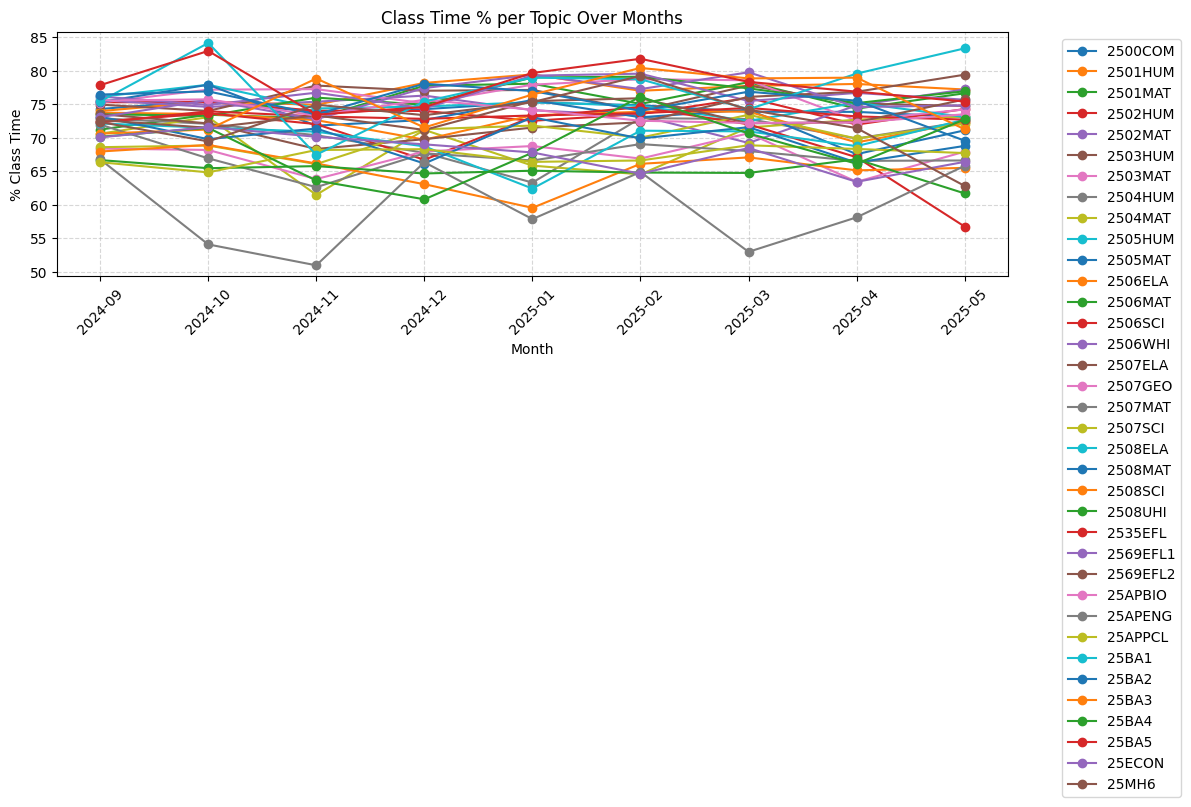

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for col in pivot_months_duration.columns[1:]:  # skip 'month'
    plt.plot(
        pivot_months_duration['month'].astype(str),  # x-axis as string
        pivot_months_duration[col], 
        marker='o',
        label=col
    )

plt.title('Class Time % per Topic Over Months')
plt.xlabel('Month')
plt.ylabel('% Class Time')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # put legend outside
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [163]:
df['Topic'].unique()

array(['2501HUM', '2500COM', '25BA1', '25BA4', '2501MAT', '2535EFL',
       '2503HUM', '2502HUM', '25BA5', '25BA2', '2503MAT', '2502MAT',
       '2505HUM', '2504HUM', '25MH6', '25BA3', '2505MAT', '2504MAT',
       '2569EFL1', '2506MAT', '2506ELA', '2506WHI', '2506SCI', '2507ELA',
       '2507MAT', '2507SCI', '2507GEO', '2569EFL2', '2508MAT', '2508UHI',
       '2508ELA', '2508SCI', '25APBIO', '25APENG', '25APPCL', '25ECON'],
      dtype=object)

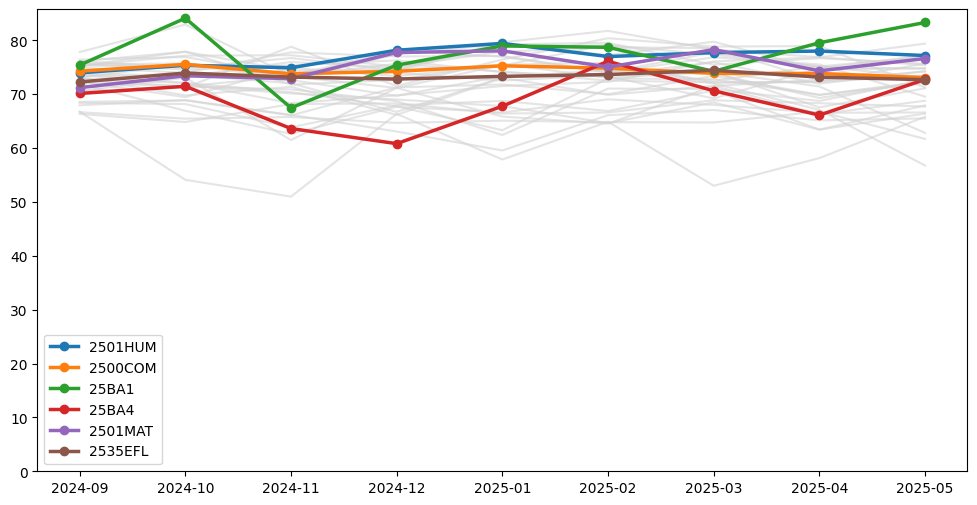

In [175]:
plt.figure(figsize=(12,6))
for col in pivot_months_duration.columns[1:]:
    plt.plot(pivot_months_duration['month'].astype(str), pivot_months_duration[col], color='lightgray', alpha=0.6)

# Highlight specific classes
highlight = ['2501HUM', '2500COM', '25BA1', '25BA4', '2501MAT', '2535EFL']
for col in highlight:
    plt.plot(pivot_months_duration['month'].astype(str), pivot_months_duration[col], marker='o', linewidth=2.5, label=col)

plt.ylim(bottom=0)
plt.legend()
plt.show()


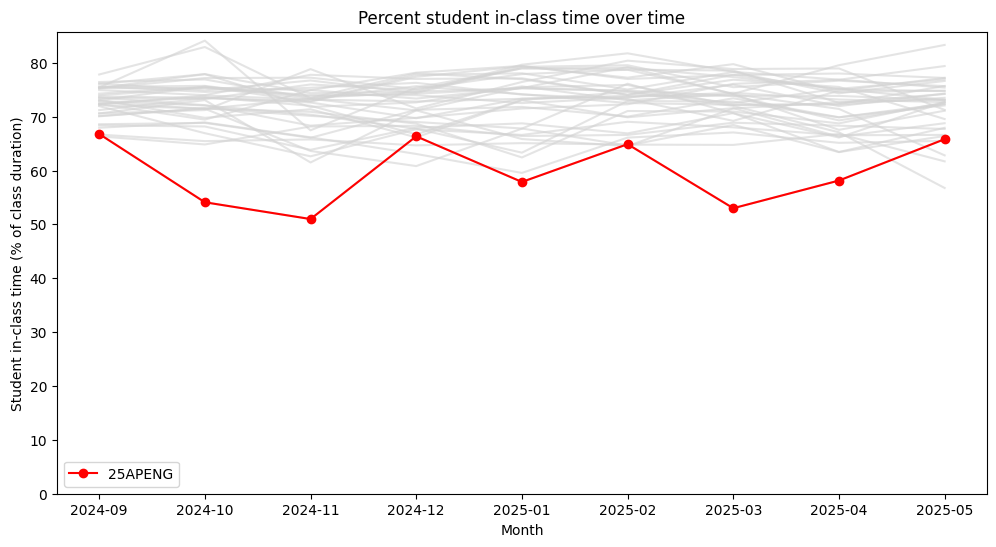

In [181]:
plt.figure(figsize=(12,6))

for col in pivot_months_duration.columns[1:]:
    plt.plot(
        pivot_months_duration['month'].astype(str),
        pivot_months_duration[col],
        color='lightgray', alpha=0.6
    )

highlight = ['25APENG']
for col in highlight:
    plt.plot(
        pivot_months_duration['month'].astype(str),
        pivot_months_duration[col],
        color='red', alpha=1, label=col, marker='o'
    )

plt.ylim(bottom=0)
plt.xlabel('Month')
plt.ylabel('Student in-class time (% of class duration)')
plt.title('Percent student in-class time over time')
plt.legend()
plt.show()

---

`Q6: How are students' behavior based on day of the week?`

In [52]:
df.columns

Index(['Topic', 'ID', 'Host name', 'Host email', 'Start time', 'End time',
       'Participants', 'Duration (minutes)', 'Name (original name)', 'Email',
       'Join time', 'Leave time', 'student_stay_duration', 'Guest', 'SID',
       'date', 'time', 'day_of_week', 'hour', 'stu_join_time',
       'stu_leave_time', 'SID_str', 'role', 'student_stay_percent',
       'minutes_late', 'is_late', 'minutes_leave_early', 'leave_early'],
      dtype='object')

In [53]:
dow_stats = df.groupby('day_of_week').agg(
    participants=('Participants', 'mean'),
    minutes_late=('minutes_late', 'mean'),
    minutes_leave_early=('minutes_leave_early', 'mean'),
    student_stay_duration=('student_stay_duration', 'mean'),
    is_late=('is_late', 'mean'),
    leave_early=('leave_early','mean')
).reset_index()

dow_stats

,day_of_week,participants,minutes_late,minutes_leave_early,student_stay_duration,is_late,leave_early
0,Friday,63.176320,11.554523,6.482449,45.825613,0.187979,0.089532
1,Monday,140.260182,10.034625,5.762107,43.006152,0.155672,0.081537
2,Thursday,137.892237,10.272913,6.519691,43.206501,0.162047,0.091712
3,Tuesday,136.371426,9.996801,6.186787,43.747462,0.155638,0.086507
4,Wednesday,138.489333,9.960348,5.993928,42.834909,0.154776,0.080695


It seems that there is not much difference (in participation level, late arrivals or early leavings) between different days of the week. 

In [54]:
hour_stats = df.groupby('hour').agg(
    participants=('Participants', 'mean'),
    minutes_late=('minutes_late', 'mean'),
    minutes_leave_early=('minutes_leave_early', 'mean'),
    student_stay_duration=('student_stay_duration', 'mean'),
    is_late=('is_late', 'mean'),
    leave_early=('leave_early','mean')
).reset_index()

In [55]:
hour_stats

,hour,participants,minutes_late,minutes_leave_early,student_stay_duration,is_late,leave_early
0,18,132.596533,11.668382,6.051490,42.769404,0.187995,0.086227
1,19,136.090037,9.474822,6.323989,45.844007,0.145512,0.087342
2,20,131.044285,7.359845,5.884999,37.389715,0.106102,0.076845


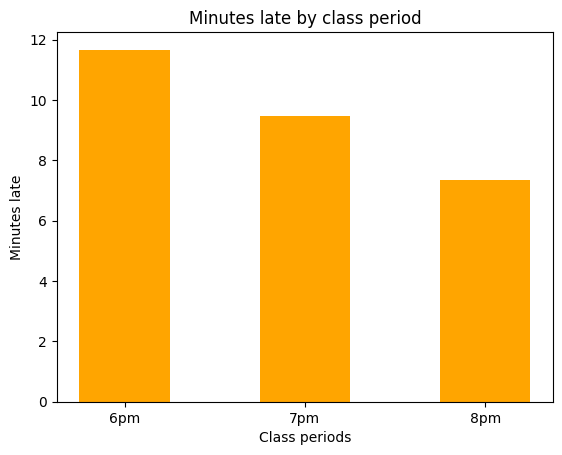

In [109]:
classes = ['6pm', '7pm', '8pm']

plt.bar(range(len(classes)), hour_stats['minutes_late'], color='orange', width=0.5)
plt.xlabel('Class periods')
plt.ylabel('Minutes late')
plt.title('Minutes late by class period')
plt.xticks(range(len(classes)), classes)
plt.show()

There are more late arrivals in the first period (6pm), but only 2 minutes 